In [1]:
# reference: https://www.kaggle.com/tanersekmen/google-job-title

# Load libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 

from string import punctuation
from cytoolz import isdistinct, topk
from operator import itemgetter
from itertools import product
from collections import Counter

import nltk
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer 

stop_words = stopwords.words('english')
stops = set(stop_words)
stops.update(set(punctuation))

In [2]:
# local variables
sample_data_path = 'data/sample_data/'

# jobs data
jobs = pd.read_csv(sample_data_path + 'jobs_sample_cleared.csv')
jobs

,Unnamed: 0,JobID,Title,Description,Requirements,State,City
0,0,1,Security Engineer/Technical Lead,Security Clearance Required: Top Secret Job Nu...,SKILL SETNetwork Security tools:Webdefend Web ...,DC,Washington
1,1,4,SAP Business Analyst / WM,NO Corp. to Corp resumesare being considered f...,WHAT YOU NEED: Four year college degreeMinimum...,NC,Charlotte
2,2,7,P/T HUMAN RESOURCES ASSISTANT,P/T HUMAN RESOURCES ASSISTANT —— 1-2 y...,Please refer to the Job Description to view th...,FL,Winter Park
3,3,8,Route Delivery Drivers,CITY BEVERAGES Come to work for the best in th...,Please refer to the Job Description to view th...,FL,Orlando
4,4,9,Housekeeping,I make sure every part of their day is magica...,Please refer to the Job Description to view th...,FL,Orlando
...,...,...,...,...,...,...,...
65563,65563,492807,Sr Financial Analyst,Classification: Financial Business Analyst C...,-5-6 years related experience.•Bachelors in Ac...,CA,San Jose
65564,65564,493018,Site Manager - New visions Teacher Effectivene...,"Site Manager, New Visions Teacher Effectiven...",Qualifications We are seeking candidates who b...,NY,Brooklyn
65565,65565,493028,Volkswagen Internet Sales Professional,Description: Automobile SalespersonAutomobile ...,Automobile Salesperson Job Duties: Understa...,GA,Snellville
65566,65566,493055,Sr. Communications Specialist,About Sauer-Danfoss Sauer-Danfoss Inc. is a wo...,Qualifications: Degree in Communications...,MN,Minneapolis


### Basic Exploratory Data Analysis (EDA)

In [3]:
jobs = jobs.rename(columns={'Unnamed: 0':'index'})
jobs

,index,JobID,Title,Description,Requirements,State,City
0,0,1,Security Engineer/Technical Lead,Security Clearance Required: Top Secret Job Nu...,SKILL SETNetwork Security tools:Webdefend Web ...,DC,Washington
1,1,4,SAP Business Analyst / WM,NO Corp. to Corp resumesare being considered f...,WHAT YOU NEED: Four year college degreeMinimum...,NC,Charlotte
2,2,7,P/T HUMAN RESOURCES ASSISTANT,P/T HUMAN RESOURCES ASSISTANT —— 1-2 y...,Please refer to the Job Description to view th...,FL,Winter Park
3,3,8,Route Delivery Drivers,CITY BEVERAGES Come to work for the best in th...,Please refer to the Job Description to view th...,FL,Orlando
4,4,9,Housekeeping,I make sure every part of their day is magica...,Please refer to the Job Description to view th...,FL,Orlando
...,...,...,...,...,...,...,...
65563,65563,492807,Sr Financial Analyst,Classification: Financial Business Analyst C...,-5-6 years related experience.•Bachelors in Ac...,CA,San Jose
65564,65564,493018,Site Manager - New visions Teacher Effectivene...,"Site Manager, New Visions Teacher Effectiven...",Qualifications We are seeking candidates who b...,NY,Brooklyn
65565,65565,493028,Volkswagen Internet Sales Professional,Description: Automobile SalespersonAutomobile ...,Automobile Salesperson Job Duties: Understa...,GA,Snellville
65566,65566,493055,Sr. Communications Specialist,About Sauer-Danfoss Sauer-Danfoss Inc. is a wo...,Qualifications: Degree in Communications...,MN,Minneapolis


In [4]:
jobs.dtypes

index            int64
JobID            int64
Title           object
Description     object
Requirements    object
State           object
City            object
dtype: object

In [5]:
# Checking the null values in the dataset
jobs.isnull().any()

index           False
JobID           False
Title           False
Description      True
Requirements     True
State           False
City            False
dtype: bool

In [6]:
# Checking if there is any NaN
jobs.isnull().sum()

index              0
JobID              0
Title              0
Description        9
Requirements    8616
State              0
City               0
dtype: int64

In [7]:
# Calculates the number of rows and columns
print(jobs.shape)

(65568, 7)


### Visualize Data

In [8]:
jobs['Title'].value_counts().head(20)

Own Your Own Franchise!                                      379
Account Representative                                       303
Administrative Assistant                                     276
Customer Service Representative                              274
Sales / Franchise                                            213
Customer Service - Sales Representative - Part Time Work     210
Earn $50+ A Week, Part Time: Market Research: All Qualify    202
Mobile Tool Sales / Franchise Distributor                    198
Retail Wireless Sales Consultant                             196
Jani-King Franchise Business Opportunity                     192
Sales Representative                                         182
Project Manager                                              176
Outside Sales Representative                                 172
Retail Sales Associate                                       164
Staff Accountant                                             162
Senior Accountant        

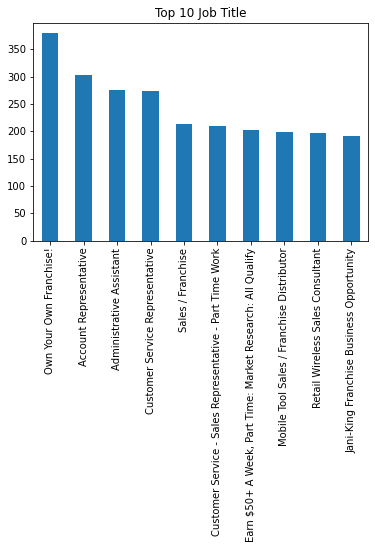

In [9]:
plt.title('Top 10 Job Title')
top_location = jobs['Title'].value_counts().sort_values(ascending=False).head(10)
top_location.plot(kind='bar')

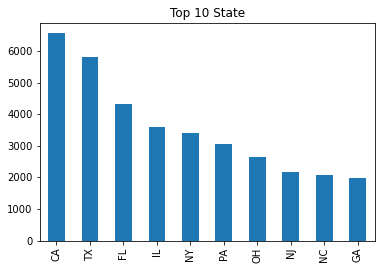

In [10]:
plt.title('Top 10 State')
top_location = jobs['State'].value_counts().sort_values(ascending=False).head(10)
top_location.plot(kind='bar')

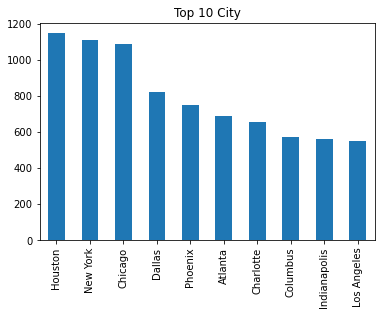

In [11]:
plt.title('Top 10 City')
top_location = jobs['City'].value_counts().sort_values(ascending=False).head(10)
top_location.plot(kind='bar')

## Data Preprocessing
### Droping NA

In [12]:
jobs = jobs.dropna(how='any',axis='rows')
jobs.isnull().sum()

index           0
JobID           0
Title           0
Description     0
Requirements    0
State           0
City            0
dtype: int64

In [13]:
jobs['Requirements'].head(10)

0    SKILL SETNetwork Security tools:Webdefend Web ...
1    WHAT YOU NEED: Four year college degreeMinimum...
2    Please refer to the Job Description to view th...
3    Please refer to the Job Description to view th...
4    Please refer to the Job Description to view th...
5    Please refer to the Job Description to view th...
6    Please refer to the Job Description to view th...
7    Please refer to the Job Description to view th...
8    Please refer to the Job Description to view th...
9    Please refer to the Job Description to view th...
Name: Requirements, dtype: object

### Removing outlines

In [14]:
filtered_set = set()
filtered_set.add('Please refer to the Job Description to view the requirements for this job')
filtered_set.add('See above job description.')
filtered_set.add('See job description.')
filtered_set

{'Please refer to the Job Description to view the requirements for this job',
 'See above job description.',
 'See job description.'}

In [15]:
# Drop outlines
print("Data size before removing outlines: ", len(jobs))
indexNames = []
for key in jobs['Requirements'].keys():
    if jobs['Requirements'][key] in filtered_set:
        indexNames.append(key)
jobs.drop(indexNames , inplace=True)
print("Data size after removing outlines: ", len(jobs))

Data size before removing outlines:  56945
Data size after removing outlines:  54077


//anaconda3/envs/conda-venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Standardized Job Title 

In [16]:
# Reference: https://www.kaggle.com/estasney/exploring-job-titles-node2vec/notebook
def int_to_roman(x):
    """
    Normalizing titles like software engineer 3
    
    Also filters out numbers that are not likely part of a seniority description, i.e. 2000 
    """
    
    if not x.isnumeric():
        return x
    x = int(x)
    ints = (1000, 900,  500, 400, 100,  90, 50,  40, 10,  9,   5,  4,   1)
    nums = ('M',  'CM', 'D', 'CD','C', 'XC','L','XL','X','IX','V','IV','I')
    result = []
    for i in range(len(ints)):
        count = int(x / ints[i])
        result.append(nums[i] * count)
        x -= ints[i] * count
    result = ''.join(result).lower()
    if any([n in result for n in ['M', 'C', 'D', 'X', 'L']]):
        return ""
    return ''.join(result).lower()

In [17]:
def tokenize(x:str):
    return wordpunct_tokenize(x)

def lowercase(x:list):
    return [token.lower() for token in x]

def remove_stopwords(x:list, stopwords=stops):
    return [token for token in x if token not in stopwords]

def is_truthy(x):
    if x:
        return True
    return False

def preprocess_title(x:str):
    if pd.isna(x) or x == "":
        return []
    tokens = tokenize(x)
    tokens = lowercase(tokens)
    tokens = remove_stopwords(tokens)
    if not tokens:
        return []
    tokens = [int_to_roman(token) for token in tokens]
    tokens = list(filter(is_truthy, tokens))
    return tokens

In [18]:
# Get title counts
df = jobs['Title']

title_counts = Counter(df.apply(lambda x: " ".join(preprocess_title(x))).values)
del title_counts['']

In [19]:
def get_gram_counts(tokens, best_grams):
    results = [] 
    seen = set()
    if not best_grams:
        gram_product = product(tokens, repeat=2)
    else:
        gram_product = product(tokens, best_grams)
    for title_grams in gram_product:
        if not isdistinct(title_grams):
            continue
        title = " ".join(title_grams)
        if title in seen:
            continue
        else:
            seen.add(title)
        count = title_counts.get(title, 0)
        results.append((title, count))
    return sorted(results, key=itemgetter(1), reverse=True)

In [20]:
def optimize_title(x:str, topn=3, title_counts=title_counts):
    tokens = preprocess_title(x)
    if not tokens:
        return x
    if len(tokens)==1:
        return tokens[0]
    
    starting_score = title_counts.get(x, 1)
    best_ngrams = [(token, title_counts.get(token, 0)) for token in tokens]
    gram_counter = 2
    while gram_counter <= len(tokens): # Continue chaining tokens to get the highest score
        gram_counts = get_gram_counts(tokens, [token for token, score in best_ngrams])
        best_ngrams.extend(gram_counts)
        best_ngrams = list(topk(topn, best_ngrams, key=itemgetter(1)))
        if not any([g in best_ngrams for g in gram_counts]):  # The most recent get_gram_counts did not 'make the cut'
            best_ngram_found = topk(1, best_ngrams, key=itemgetter(1))[0]
            best_ngram, best_ngram_score = best_ngram_found
            if best_ngram_score > starting_score:
                return best_ngram
            else:
                return x
        gram_counter += 1
    return best_ngrams[0][0]

### Sampling for standardized Job Title

In [21]:
for title, count in sorted(title_counts.items(), key=itemgetter(1))[:50]:
    optimum_title = optimize_title(title)
    optimum_count = title_counts[optimum_title]
    print("{}, Count: {}  =======> {}, Count: {}".format(title, count, optimum_title, optimum_count))

security engineer technical lead, Count: 1  =======> engineer, Count: 11
sap business analyst wm, Count: 1  =======> business analyst, Count: 120
owner operators fleet owners, Count: 1  =======> owner operators fleet owners, Count: 1
mold press machine operator, Count: 1  =======> machine operator, Count: 39
electronics repair technician, Count: 1  =======> technician, Count: 18
ceramic tile installers tools transportation, Count: 1  =======> ceramic tile installers tools transportation, Count: 1
data entry full time, Count: 1  =======> data entry, Count: 11
hospitality positions, Count: 1  =======> hospitality positions, Count: 1
insurance collections representative, Count: 1  =======> collections, Count: 5
staffing recruiter coordinator established medical staffing, Count: 1  =======> recruiter, Count: 43
licensed real estate assistant computer savvy boca, Count: 1  =======> assistant, Count: 3
director – infrastructure information security, Count: 1  =======> director, Count: 6
assi

In [22]:
jobs['Title'] = jobs['Title'].apply(lambda x: optimize_title(x))
jobs['Title']

//anaconda3/envs/conda-venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0                              engineer
1                      business analyst
42                               driver
83       Owner Operators - Fleet Owners
116                    machine operator
                      ...              
65563                 financial analyst
65564                   project manager
65565                sales professional
65566                        specialist
65567                       coordinator
Name: Title, Length: 54077, dtype: object

### Filter Data

In [23]:
jobs['Title'].value_counts(normalize=False, sort=True, ascending=True, bins=None, dropna=True)

Department Chair for General Education       1
.NET/C# DEVELOPERS                           1
doctor optometry                             1
Information Technology Services              1
Associate Editor - Journey Magazine          1
                                          ... 
specialist                                1205
franchise                                 1211
sales representative                      2078
sales                                     3605
manager                                   3626
Name: Title, Length: 4308, dtype: int64

### Removing data with low frequency

In [24]:
value_frequency = 100

Job_Title = pd.DataFrame(jobs['Title'], columns=['Title'])
indexes = Job_Title[Job_Title.groupby('Title').Title.transform(len) <= value_frequency].index
len(indexes)

15270

In [25]:
print("Data size before removing low frequency elements: ", len(jobs))
jobs.drop(indexes, inplace=True)
print("Data size after removing low frequency elements: ", len(jobs))

Data size before removing low frequency elements:  54077
Data size after removing low frequency elements:  38807


In [26]:
jobs['Title'].value_counts(normalize=False, sort=True, ascending=True, bins=None, dropna=True)

accounts receivable      101
paralegal                102
director nursing         102
instructor               103
therapist                104
                        ... 
specialist              1205
franchise               1211
sales representative    2078
sales                   3605
manager                 3626
Name: Title, Length: 95, dtype: int64

### TF-IDF and removing stopwords

In [27]:
tfidf = TfidfVectorizer(use_idf=True, stop_words=stop_words)

job_tfidf = tfidf.fit_transform(jobs['Requirements'])
job_tfidf

<38807x53961 sparse matrix of type '<class 'numpy.float64'>'
	with 2580844 stored elements in Compressed Sparse Row format>

### Sampling Java Developer TF-IDF

In [28]:
java_developer = jobs[ jobs['Title'] == 'java developer' ]
java_developer

,index,JobID,Title,Description,Requirements,State,City
388,388,1418,java developer,As a member of the Web and Portal Development ...,Requires a Bachelor's degree and two years dir...,KY,Louisville
395,395,1442,java developer,HSI & The Department o...,• Minimum of (3) three years experience as a J...,NC,Raleigh
713,713,2604,java developer,Application Developer-Senior-JavaSummary:This ...,Minimum Experience Minimum 7 years of exper...,NY,New York
2426,2426,9164,java developer,The Wells Fargo Home Mortgage Servicing Defaul...,* Basic Qualifications: 5+ years application d...,MN,Minneapolis
3176,3176,12789,java developer,Security Clearance: Public TrustExperience dev...,A Total Value package.There is much to be said...,VA,Arlington
...,...,...,...,...,...,...,...
64024,64024,432393,java developer,This company never takes itself too seriously ...,"Bachelors Degree, Java, JavaScripts, XML, HTML...",NC,Cary
64298,64298,443212,java developer,MDI Group is a premier IT workforce solutions ...,Java Swing,TX,Fort Worth
64557,64557,453866,java developer,Duties & Responsibilities The Key Responsibili...,,MA,Cambridge
65214,65214,478470,java developer,VML is one of the most innovative marketin...,(See Job Description),MO,Kansas City


In [29]:
# we need an index map for mapping Jave Developer index to jobs index
index_map = {}
count = 0
for index in jobs['index']:
    index_map[index] = count
    count += 1

In [30]:
java_developer_tfidf = []
for index in java_developer['index']:
    java_developer_tfidf.append( job_tfidf[ index_map[index] ])
java_developer_tfidf[1]

<1x53961 sparse matrix of type '<class 'numpy.float64'>'
	with 59 stored elements in Compressed Sparse Row format>

In [31]:
jobs['Requirements'][713]

"Minimum Experience    Minimum 7 years of experience in web application development and architecture, using Java and related technologies for new feature development    In-depth experience with Java (J2EE/J2SE) and related technologies: Spring Framework, Hibernate, & JUnit    Solid understanding of OOP and relational databases\xa0for implementing database-driven, web-based applications    Solid understanding of data structures    Solid understanding of design patterns    Strong hands-on knowledge of\xa0XML/XSL    Java and J2EE Fluency    Database: SQL, JDBC, Hibernate    Web: Spring, Struts, JSP, Servlet,JSTL,    Containers: Tomcat, WebLogic    XML: JDOM, SAX, XSLT, XStream    Build: Eclipse, Maven, Ant, NetBeans, JUnit    Solid understanding of UNIX    Jira, Confluence, Bamboo, Git    MacOS Minimum EducationBachelor's degree in Information Technology \xa0"

In [32]:
example = java_developer_tfidf[1]
tfidf_example = pd.DataFrame(example.T.todense(), index=tfidf.get_feature_names(), columns=['TF-IDF'])

# Sort TF-IDF by descending
tfidf_example = tfidf_example.sort_values(by=["TF-IDF"],ascending=False)

# Drop TF-IDF value less than 0
tfidf_example = tfidf_example[tfidf_example['TF-IDF'] > 0]
tfidf_example.head(15)

,TF-IDF
hod,0.215448
oracle,0.210566
java,0.204871
referenced,0.203605
subsequent,0.194039
environmentpreferred,0.188935
sql,0.177452
host,0.172805
three,0.171794
triggers,0.171439


### Only keeping noun for the job requirements as skill set

In [33]:
# Reference: http://www.nltk.org/book/ch05.html
# Reference: https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html

def get_noun(text):

    tokens = nltk.word_tokenize(text)
    tagged = nltk.pos_tag(tokens)

    tagged_filtered = []
    for tag in tagged:
        if 'NN' in tag[1]:
            tagged_filtered.append(tag[0].lower())
    return ' '.join(tagged_filtered)

In [34]:
# example = 'Extensive knowledge of Java, Golang, RESTful API, MySQL, JS, Python, HTML, CSS, SQL, Git, Bash, AWS EC2, S3, LB, ECR, RDS, VPC, Cognito, API Gateway, Lambda, CodePipeline, etc Tool, Docker, Redis, Postman, Nginx, React, AngularJS, Maven, Spring, Kafka, Cassandra, Hadoop Knowledge, Agile, JSON, Map Reduce, Message Queue, Bootstrap'
example = 'Experience with one or more general purpose programming languages including but not limited to: Java, C/C++, C#, Objective C, Python, JavaScript, or Go'

tokens = nltk.word_tokenize(example)
tagged = nltk.pos_tag(tokens)
print(pd.DataFrame(tagged).rename(columns={0:'Skill set', 1:'Tag'}))

      Skill set  Tag
0    Experience   NN
1          with   IN
2           one   CD
3            or   CC
4          more  JJR
5       general   JJ
6       purpose   NN
7   programming   NN
8     languages  VBZ
9     including  VBG
10          but   CC
11          not   RB
12      limited   JJ
13           to   TO
14            :    :
15         Java  NNP
16            ,    ,
17        C/C++  NNP
18            ,    ,
19            C  NNP
20            #    #
21            ,    ,
22    Objective  NNP
23            C  NNP
24            ,    ,
25       Python  NNP
26            ,    ,
27   JavaScript  NNP
28            ,    ,
29           or   CC
30           Go   VB


In [35]:
example = 'Extensive knowledge of Java, Golang, RESTful API, MySQL, JS, Python, HTML, CSS, SQL, Git, Bash, AWS EC2, S3, LB, ECR, RDS, VPC, Cognito, API Gateway, Lambda, CodePipeline, etc Tool, Docker, Redis, Postman, Nginx, React, AngularJS, Maven, Spring, Kafka, Cassandra, Hadoop Knowledge, Agile, JSON, Map Reduce, Message Queue, Bootstrap'
example = jobs['Requirements'][713]
print('\n Before extracting noun from the text: \n{}'.format(example))
example = get_noun(example)
print('\n After extracting noun from the text: \n{}'.format(example))


 Before extracting noun from the text: 
Minimum Experience    Minimum 7 years of experience in web application development and architecture, using Java and related technologies for new feature development    In-depth experience with Java (J2EE/J2SE) and related technologies: Spring Framework, Hibernate, & JUnit    Solid understanding of OOP and relational databases for implementing database-driven, web-based applications    Solid understanding of data structures    Solid understanding of design patterns    Strong hands-on knowledge of XML/XSL    Java and J2EE Fluency    Database: SQL, JDBC, Hibernate    Web: Spring, Struts, JSP, Servlet,JSTL,    Containers: Tomcat, WebLogic    XML: JDOM, SAX, XSLT, XStream    Build: Eclipse, Maven, Ant, NetBeans, JUnit    Solid understanding of UNIX    Jira, Confluence, Bamboo, Git    MacOS Minimum EducationBachelor's degree in Information Technology  

 After extracting noun from the text: 
experience minimum years experience application development 

In [36]:
jobs['Requirements'] = jobs['Requirements'].apply(lambda x: get_noun(x))
# jobs['Requirements']

//anaconda3/envs/conda-venv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
jobs_set = []
for Requirements in jobs['Requirements']:
    job_vector = set()
    for word in list(Requirements.split(' ')):
        job_vector.add(word)
    jobs_set.append(job_vector)

print(len(jobs_set))
print(len(jobs))


38807
38807


## Testing

In [38]:
user_profile = set(['knowledge', 'java', 'golang', 'restful', 'api', 'mysql', 'js', 'python', 'html', 'css', 'sql', 'git', 'bash', 'aws', 'ec2', 's3', 'lb', 'ecr', 'rds', 'vpc', 'cognito', 'api', 'gateway', 'lambda', 'codepipeline', 'tool', 'docker', 'redis', 'postman', 'nginx', 'react', 'angularjs', 'maven', 'spring', 'kafka', 'cassandra', 'hadoop', 'knowledge', 'agile', 'json', 'map', 'reduce', 'message', 'queue', 'bootstrap'])
user_profile

{'agile',
 'angularjs',
 'api',
 'aws',
 'bash',
 'bootstrap',
 'cassandra',
 'codepipeline',
 'cognito',
 'css',
 'docker',
 'ec2',
 'ecr',
 'gateway',
 'git',
 'golang',
 'hadoop',
 'html',
 'java',
 'js',
 'json',
 'kafka',
 'knowledge',
 'lambda',
 'lb',
 'map',
 'maven',
 'message',
 'mysql',
 'nginx',
 'postman',
 'python',
 'queue',
 'rds',
 'react',
 'redis',
 'reduce',
 'restful',
 's3',
 'spring',
 'sql',
 'tool',
 'vpc'}

### Jaccard Similarity based matching

In [39]:
similarities = []
ID = 0
for job in jobs_set:
    
    count = 0
    similarity = 0.0
    for skill in job:
        if skill in user_profile:
            count += 1
    
    if (len(skill)) - count != 0:
        similarity = count / ( len(skill) + len(user_profile) - count )
        
    similarities.append([ID, similarity])
    ID += 1
    
# similarities

In [40]:
similarities = pd.DataFrame(similarities)
similarities = similarities.rename(columns={0:'index', 1:'Similarity'})
similarities

,index,Similarity
0,0,0.000000
1,1,0.000000
2,2,0.000000
3,3,0.021277
4,4,0.000000
...,...,...
38802,38802,0.000000
38803,38803,0.018519
38804,38804,0.021277
38805,38805,0.000000


### Providing top 10 recommandation based on similarity

In [41]:
similarities = similarities.sort_values(by=["Similarity"],ascending=False)
top_10_jobs = similarities.head(10)
top_10_jobs

,index,Similarity
22788,22788,0.277778
21314,21314,0.175000
6876,6876,0.166667
3865,3865,0.166667
3870,3870,0.166667
19200,19200,0.166667
19201,19201,0.166667
9909,9909,0.155556
35207,35207,0.155556
626,626,0.155556


In [42]:
jobs.iloc[top_10_jobs['index']]

,index,JobID,Title,Description,Requirements,State,City
38992,38992,800943,java developer,The Senior Java Developer will be responsible ...,requirements years software development years ...,OH,Cleveland
36598,36598,750572,java developer,Our Client (PRESTIGOUS EDUCATIONAL INSTITUTION...,years experience experience html css js ajaxex...,NY,New York
11831,11831,179962,web developer,Our fast growing and well established client i...,b.s studies computer science experience years ...,CA,Palo Alto
6723,6723,67273,java developer,TATA Consultancy Services (TCS) is currently s...,job requirements java spring core jdbc transac...,TX,Dallas
6728,6728,67297,java developer,TATA Consultancy Services (TCS) is currently s...,job requirements java spring core jdbc transac...,MO,Saint Louis
32910,32910,667566,java developer,TATA Consultancy Services (TCS) is currently s...,job requirements java spring core jdbc transac...,WI,Milwaukee
32911,32911,667567,java developer,TATA Consultancy Services (TCS) is currently s...,job requirements java spring core jdbc transac...,TX,Dallas
17102,17102,306344,developer,Senior Mobile Applications Developer for Inter...,senior mobile applications developer broomfiel...,CO,Broomfield
59836,59836,262056,net developer,Write functional and technical specifications....,minimum years experience solutions microsoft t...,CA,Encino
1515,1515,6116,developer,Senior Mobile Applications Developer for Inter...,senior mobile applications developer broomfiel...,CA,San Mateo


In [43]:
jobs.iloc[17130]

index                                                       29473
JobID                                                      595309
Title                                              java developer
Description                                          Java Deve...
Requirements    years experience minimum years programming exp...
State                                                          NV
City                                                    Las Vegas
Name: 29473, dtype: object